<a href="https://colab.research.google.com/github/dogukartal/IBM_AI_Labs/blob/main/Deep%20Learning%20with%20PyTorch/Deep%20Networks/He_Weight_Initialization_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uniform, Default and He Initialization on MNIST Dataset with Relu Activation
---


In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

# Neural Network and Training Function

In [3]:
# He Initialization
class Net_He(nn.Module):
    def __init__(self, Layers):
        super(Net_He, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu') # He Initialization
            self.hidden.append(linear)

    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [5]:
# Uniform Initialization
class Net_Uniform(nn.Module):
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size,output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)

    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [6]:
# Default Initialization
class Net(nn.Module):
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)

    def forward(self, x):
        L=len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [7]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss': [], 'validation_accuracy': []}

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)

    return loss_accuracy

## Data

In [9]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

## Neural Network, Criterion Function, Optimizer and Train the Model

In [10]:
criterion = nn.CrossEntropyLoss()

# Create the parameters
input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 200, 100, output_dim]

In [11]:
# Train the model with the default initialization
model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader,validation_loader, optimizer, epochs=30)

In [12]:
# Train the model with the He initialization
model_He = Net_He(layers)
optimizer = torch.optim.SGD(model_He.parameters(), lr=learning_rate)
training_results_He = train(model_He, criterion, train_loader, validation_loader, optimizer, epochs=30)

In [13]:
# Train the model with the Uniform initialization
model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=30)

## Results

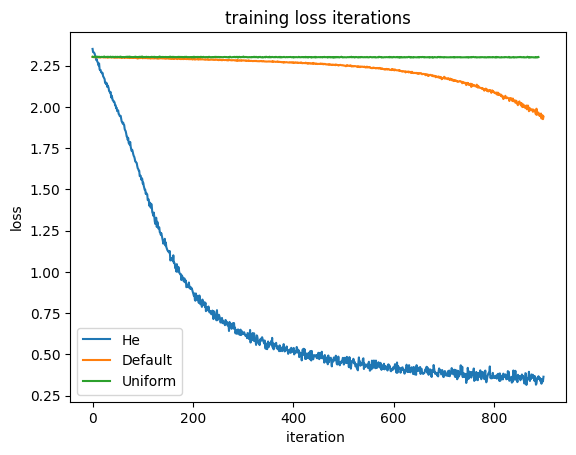

In [19]:
# Plot the loss
plt.plot(training_results_He['training_loss'], label='He')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'][10:], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')
plt.title('training loss iterations')
plt.legend()

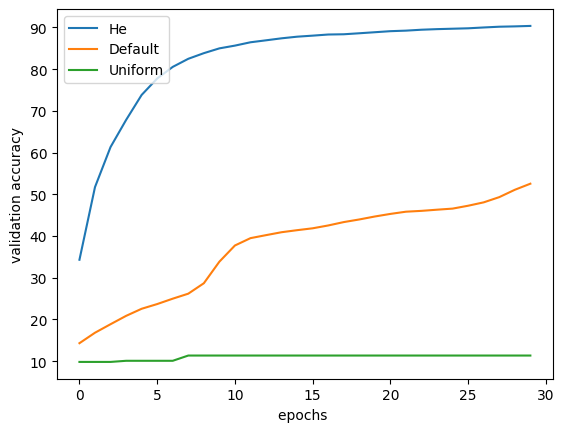

In [15]:
# Plot the accuracy
plt.plot(training_results_He['validation_accuracy'], label='He')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')
plt.legend()
plt.show()